## EDA & Feature Engineering 

## Zomato Dataset


In [ ]:
#Dataset: https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('float_format', '{:f}'.format)
df = pd.read_csv(r'C:\Users\admin\Downloads\ML\zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.800000,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.500000,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.400000,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.900000,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.800000,Dark Green,Excellent,229


In [277]:
df.shape

(9551, 21)

In [278]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [280]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [281]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [282]:
df.dropna(inplace=True) #as there are only 9 rows out of 9551 rows with zeroes I removed them.

In [283]:
df.shape

(9542, 21)

In [284]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9043300.519178,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8791967.358292,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,53.000000,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,301931.250000,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6002725.500000,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,18352604.250000,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,18500652.000000,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Data Analysis
1. Missing values
2. Explore about Numerical values
3. Explore about categorical variables
4. Relationship between features.

In [285]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.146270,-0.224362,-0.052626,-0.001629,-0.134528,-0.327160,-0.147434
Country Code,0.146270,1.000000,-0.694629,0.018049,0.043717,0.245363,0.281295,0.154361
Longitude,-0.224362,-0.694629,1.000000,0.045415,0.045948,-0.080257,-0.114733,-0.084371
Latitude,-0.052626,0.018049,0.045415,1.000000,-0.111080,-0.166735,0.000197,-0.022914
Average Cost for two,-0.001629,0.043717,0.045948,-0.111080,1.000000,0.075111,0.051864,0.067833
Price range,-0.134528,0.245363,-0.080257,-0.166735,0.075111,1.000000,0.438356,0.309474
Aggregate rating,-0.327160,0.281295,-0.114733,0.000197,0.051864,0.438356,1.000000,0.313474
Votes,-0.147434,0.154361,-0.084371,-0.022914,0.067833,0.309474,0.313474,1.000000


In [286]:
df_c = pd.read_excel(r'C:\Users\admin\Downloads\ML\country-code.xlsx')
df_c.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [287]:
final = pd.merge(df,df_c,on='Country Code',how='left')
final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.800000,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.500000,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.400000,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.900000,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.800000,Dark Green,Excellent,229,Phillipines


In [288]:
final.shape

(9542, 22)

In [289]:
country_names = final.Country.value_counts().index

In [290]:
country_val = final.Country.value_counts().values

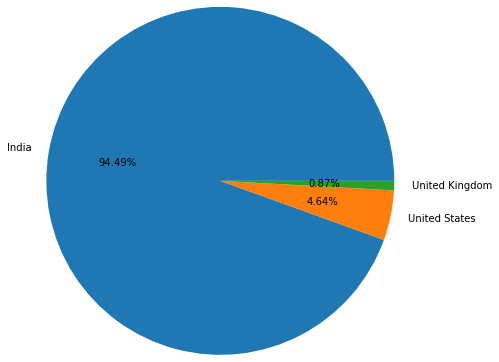

In [291]:
plt.pie(country_val[:3],labels=country_names[:3],radius=2,autopct = '%1.2f%%')
plt.show()

In [292]:
final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [293]:
ratings = final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [294]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.000000,White,Not rated,2148
1,1.800000,Red,Poor,1
2,1.900000,Red,Poor,2
3,2.000000,Red,Poor,7
4,2.100000,Red,Poor,15
5,2.200000,Red,Poor,27
6,2.300000,Red,Poor,47
7,2.400000,Red,Poor,87
8,2.500000,Orange,Average,110
9,2.600000,Orange,Average,191


## Observations

- If the rating is between 4.5 to 4.9 --> Excellent
- If the rating is between 4.0 to 3.4 --> very good
- If the rating is between 3.5 to 3.9 --> good
- If the rating is between 3.0 to 3.4 --> average
- If the rating is between 2.5 to 2.9 --> average
- If the rating is between 2.0 to 2.4 --> poor

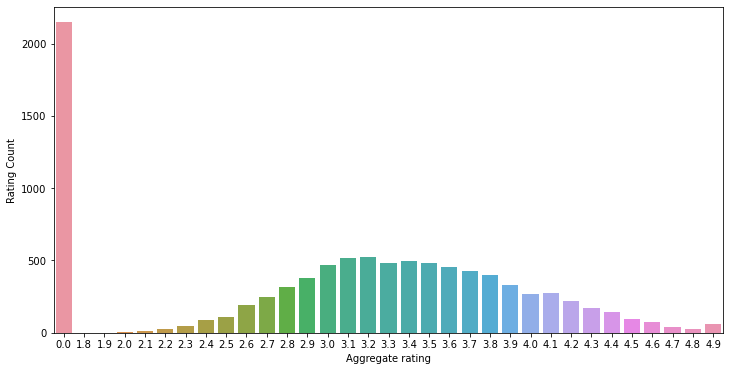

In [295]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)
plt.show()

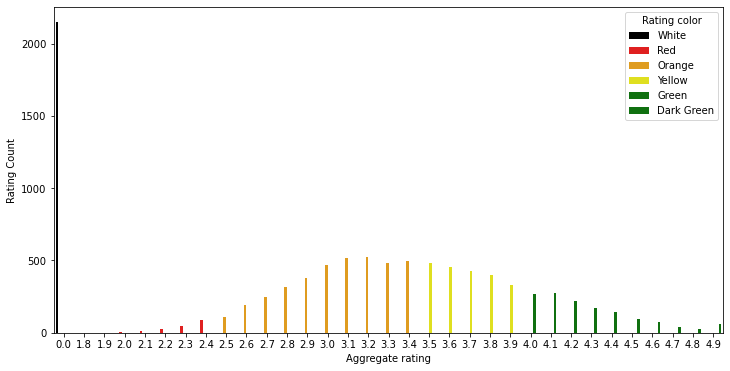

In [296]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color',data=ratings,palette = ['Black','Red','Orange','Yellow','Green','Green'])
plt.show()

## Observations:
1. Not Rating has highest counts
2. Maximum rating is between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

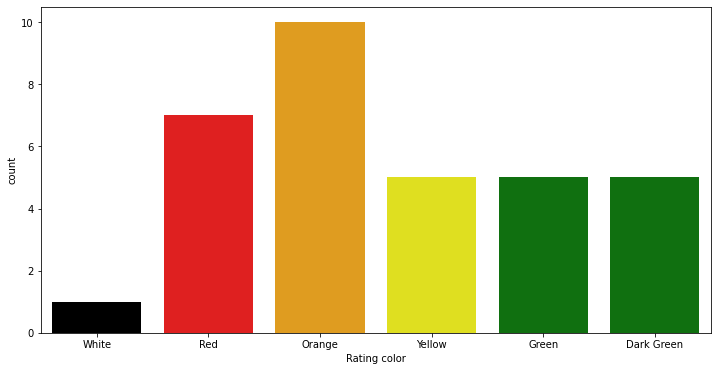

In [297]:
sns.countplot(x='Rating color',data=ratings,palette = ['Black','Red','Orange','Yellow','Green','Green'])

In [298]:
##Find the country that gave zero rating
final[final['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [299]:
final[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [300]:
Currency = final.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Currency Count'})
Currency.head()

,Country,Currency,Currency Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21


In [301]:
final.groupby(['Has Online delivery']).size().reset_index()

,Has Online delivery,0
0,No,7091
1,Yes,2451


In [302]:
final[final['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [303]:
city_values = final.City.value_counts().values
city_labels = final.City.value_counts().index

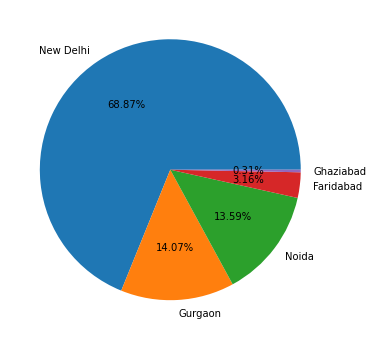

In [304]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

# Black Friday Dataset

In [1]:
#Dataset: https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering

In [305]:
df1 = pd.read_csv(r'C:\Users\admin\Downloads\ML\Black Friday\train.csv')
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [306]:
df1.shape

(550068, 12)

In [307]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [308]:
df1_test = pd.read_csv(r'C:\Users\admin\Downloads\ML\Black Friday\test.csv')
df1_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.000000,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.000000,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.000000,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.000000,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.000000,12.000000


In [309]:
df1 = df1.append(df1_test)

In [310]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [311]:
df1.shape

(783667, 12)

In [312]:
df1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [313]:
df1.drop(['User_ID'],axis=1,inplace=True)

In [314]:
#Data Preprocessing 
#Fixing the categorical features
#Also see Label Encoding
#pd.get_dummies(df1['Gender'],drop_first=True)

In [315]:
df1['Gender'] = df1['Gender'].map({'F':0,'M':1})
df1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [316]:
df1['Age'] = df1['Age'].map({'0-17':1, '18-25':2 , '26-35':3,'36-45':4, '46-50':5, '51-55':6,'55+':7})

If we want to **LABEL ENCODING** <br>
from sklearn.preprocessing import LabelEncoder <br>
labelencoder = LabelEncoder() <br>
df1['Age'] = labelencoder.fit_transform(df1['Age']) <br>
df1['Age'].unique() <br>

In [317]:
df1.head(25)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.000000
1,P00248942,0,1,10,A,2,0,1,6.000000,14.000000,15200.000000
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.000000
3,P00085442,0,1,10,A,2,0,12,14.000000,NaN,1057.000000
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.000000
5,P00193542,1,3,15,A,3,0,1,2.000000,NaN,15227.000000
6,P00184942,1,5,7,B,2,1,1,8.000000,17.000000,19215.000000
7,P00346142,1,5,7,B,2,1,1,15.000000,NaN,15854.000000
8,P0097242,1,5,7,B,2,1,1,16.000000,NaN,15686.000000
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.000000


In [318]:
df1_city = pd.get_dummies(df1['City_Category'],drop_first=True)
df1 = pd.concat([df1,df1_city],axis=1)
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.000000,0,0
1,P00248942,0,1,10,A,2,0,1,6.000000,14.000000,15200.000000,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.000000,0,0
3,P00085442,0,1,10,A,2,0,12,14.000000,NaN,1057.000000,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.000000,0,1


In [319]:
df1.drop(['City_Category'],axis=1,inplace=True)

In [320]:
df1.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [321]:
#Missing values 
df1['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [322]:
df1['Product_Category_2'].value_counts()

8.000000     91317
14.000000    78834
2.000000     70498
16.000000    61687
15.000000    54114
5.000000     37165
4.000000     36705
6.000000     23575
11.000000    20230
17.000000    19104
13.000000    15054
9.000000      8177
12.000000     7801
10.000000     4420
3.000000      4123
18.000000     4027
7.000000       854
Name: Product_Category_2, dtype: int64

In [323]:
#We rplace the missing value with mode
df1['Product_Category_2'] = df1['Product_Category_2'].fillna(df1['Product_Category_2'].mode()[0])

In [324]:
df1['Product_Category_2'].isnull().sum()

0

In [325]:
df1['Product_Category_3'].value_counts()
df1['Product_Category_3'] = df1['Product_Category_3'].fillna(df1['Product_Category_3'].mode()[0])
df1['Product_Category_2'].isnull().sum()

0

In [326]:
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\admin\AppData\Local\Temp/ipykernel_24148/500721091.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].str.replace('+','')


In [327]:
#Convert object into integers
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].astype(int)
df1['B'] = df1['B'].astype(int)
df1['C'] = df1['C'].astype(int)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

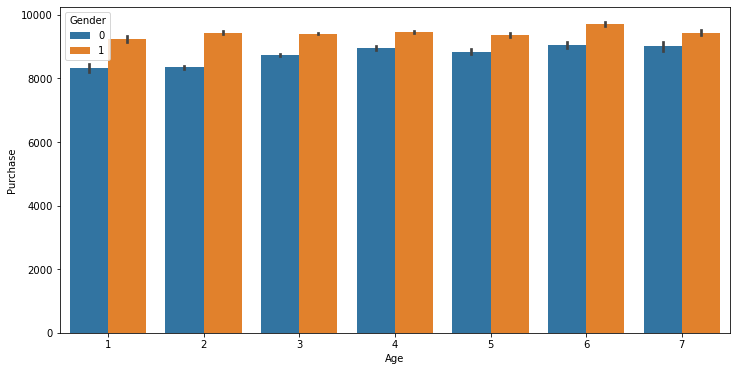

In [328]:
sns.barplot('Age','Purchase',hue='Gender',data=df1)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

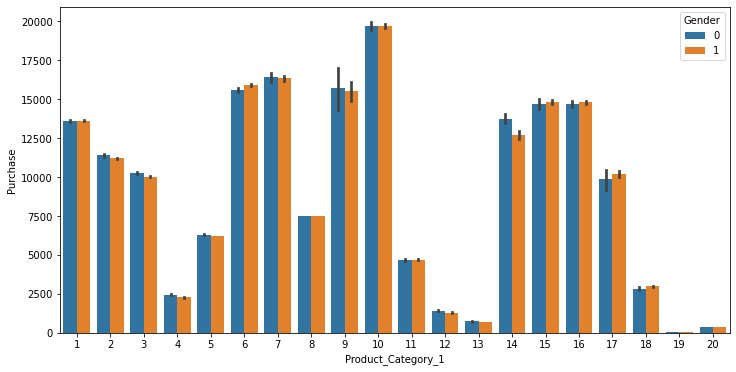

In [329]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df1)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

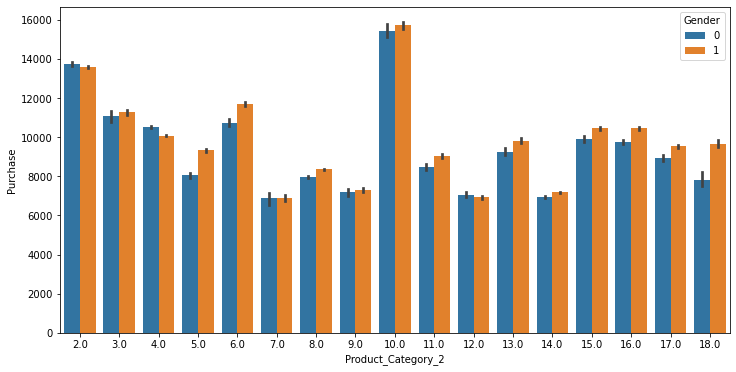

In [330]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df1)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

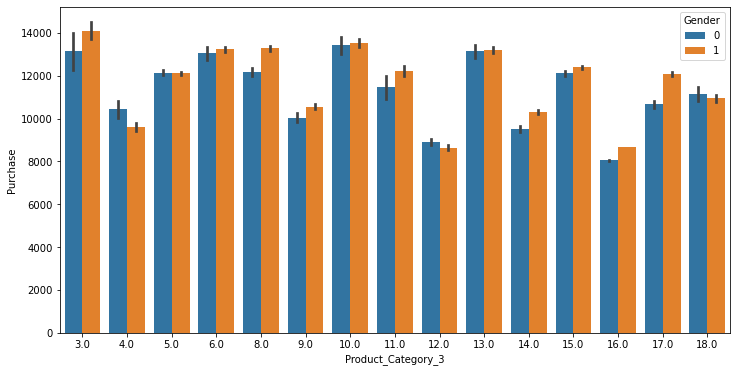

In [331]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df1)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

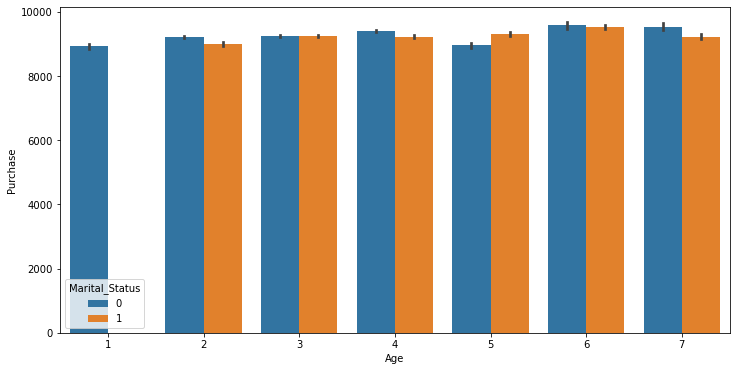

In [332]:
sns.barplot('Age','Purchase',hue='Marital_Status',data=df1)

In [333]:
#Feature Scaling

df1_test= df1[df1['Purchase'].isnull()]
df1_train= df1[~df1['Purchase'].isnull()]

In [334]:
X = df1.drop(['Purchase'],axis=1)
y = df1['Purchase']

In [335]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [337]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [338]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)